In [164]:
import matplotlib
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap  # Import the Basemap toolkit
import matplotlib.pyplot as plt
from datetime import datetime
import ims_reader
import map_projections_ims
import pickle
import _pickle as cPickle
import bz2


In [10]:
year = datetime.datetime.now().year
doy = datetime.datetime.now().strftime('%j')
base_folder = '/Volumes/Data/weather_models/snow_ims/'
coordinate_folder = base_folder

In [11]:
lon_4km = ims_reader.read_lons_4km(path=coordinate_folder)
lat_4km = ims_reader.read_lats_4km(path=coordinate_folder)
data_4km = ims_reader.read_data_4km(year=year, doy=doy)

In [92]:
lon_1km = ims_reader.read_lons_1km(path=coordinate_folder)
lat_1km = ims_reader.read_lats_1km(path=coordinate_folder)

In [155]:
data_1km = read_data_1km_compressed('ims_2020_263_1km.asc')

In [157]:
data_1km.shape

(8000, 8000)

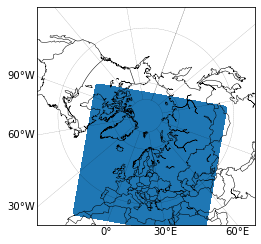

In [93]:
bmap = map_projections_ims.get_projection("nh")
x, y = bmap(lon_1km, lat_1km)
bmap.scatter(x, y)

In [162]:
from matplotlib.offsetbox import AnchoredText


def annotation(ax, text, loc='upper right',fontsize=8):
    """Put a general annotation in the plot."""
    at = AnchoredText('%s'% text, prop=dict(size=fontsize), frameon=True, loc=loc)
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.1")
    at.zorder = 10
    ax.add_artist(at)
    return(at)

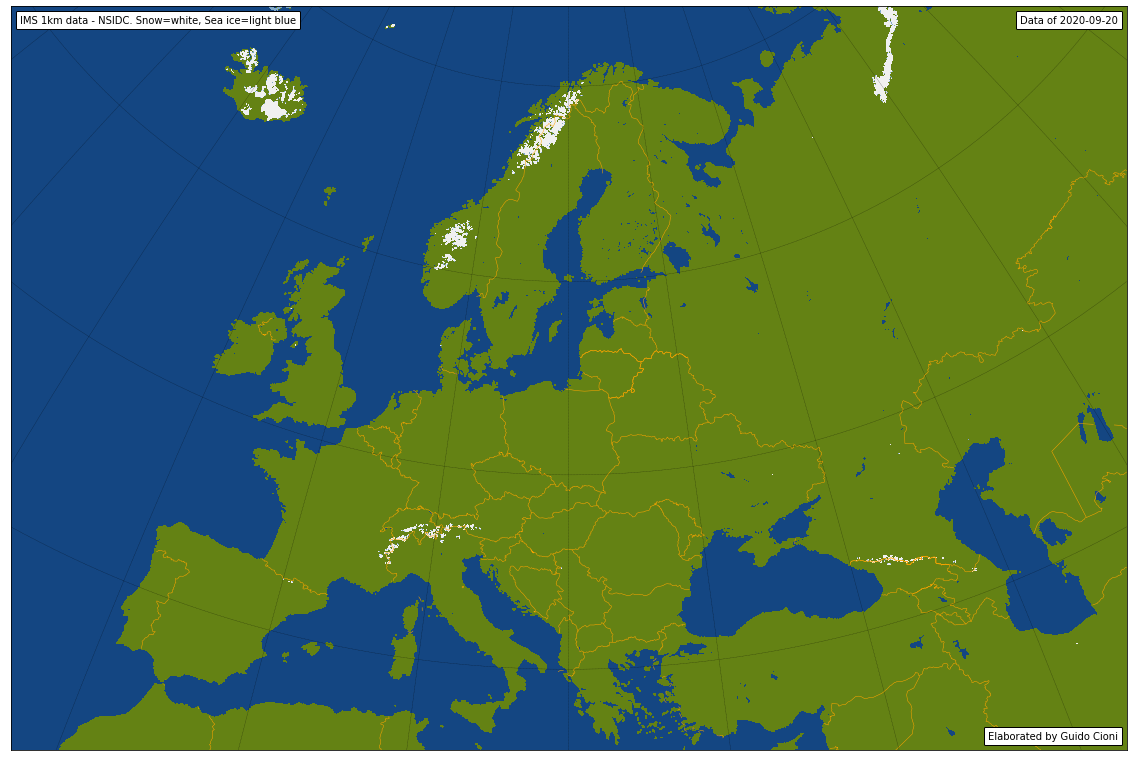

In [167]:
fig = plt.figure(figsize=(20, 20))

# bmap = map_projections_ims.get_projection("eurasia")

bmap = Basemap(projection="stere", lon_0=20, lat_0=55, boundinglat=0,
                       rsphere=6378160.0, ellps="WGS84", k_0=0.9330127018922193,
                       width=6000000, height=4000000, resolution='i')
# bmap.drawcoastlines(linewidth=0.5, linestyle='solid', color='black')
bmap.drawcountries(linewidth=0.5, linestyle='solid', color='orange')
bmap.drawparallels(np.arange(-80., 81., 10.),
                   linewidth=0.3, labels=[False, False, False, False])
bmap.drawmeridians(np.arange(-180., 181., 10.),
                   linewidth=0.3, labels=[False, False, False, False])
        
x, y = bmap(lon_1km, lat_1km)

cmap = matplotlib.colors.ListedColormap(["#144682", "#648214", "#82aac8", "#f0f0f0"])
bounds = [0, 1, 2, 3, 4]
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

annotation(plt.gca(), 'Data of '+datetime.now().strftime("%Y-%m-%d"), 'upper right', '10')
annotation(plt.gca(), 'IMS 1km data - NSIDC. Snow=white, Sea ice=light blue', 'upper left', '10')
annotation(plt.gca(), 'Elaborated by Guido Cioni', 'lower right', '10')


contour = bmap.contourf(x, y, data_1km, levels = bounds, cmap=cmap)

# ax2 = fig.add_axes([0.3, 0.18, 0.4, 0.03])
# cb2 = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap,
#                                 norm=norm,
#                                 boundaries=bounds,
#                                 ticks=[0.5, 1.5, 2.5, 3.5, 4.5],
#                                 spacing='proportional',
#                                 orientation='horizontal')
# cb2.set_ticklabels(['Ocean', 'Land', 'Ice', 'Snow'])
# cb2.ax.tick_params(size=0)

# plt.title(datetime.datetime.strptime(str(year) + str(doy), "%Y%j").strftime(
#     "%Y-%m-%d") + ' - IMS 1km data - elaborated by www.guidocioni.it')

# DPI = 150
# plt.savefig(folder + "ims_" + area + "_" + datetime.datetime.strptime(str(year) +
#                                                                       str(doy), "%Y%j").strftime("%Y%m%d") + ".png", dpi=DPI, bbox_inches='tight')
# plt.close()